## - Shipping Price Prediction.

####  - Problem Statement :

The market for supply chain analytics is expected to develop at a CAGR of 17.3 percent from 2019 to 2024, more than doubling in size. This data demonstrates how supply chain organizations are understanding the advantages of being able to predict what will happen in the future with a decent degree of certainty. Supply chain leaders may use this data to address supply chain difficulties, cut costs, and enhance service levels all at the same time.
The main goal is to predict the supply chain shipment pricing based on the available factors in the dataset.

In [2]:
import numpy as np
np.set_printoptions(precision=2)                    # To display values only upto four decimal places. 

import pandas as pd
pd.set_option('mode.chained_assignment', None)      # To suppress pandas warnings.
pd.set_option('display.max_colwidth', -1)           # To display all the data in each column
pd.options.display.max_columns = 50
pd.set_option('display.float_format',lambda x: '%.2f' % x)                 # To display every column of the dataset in head()

import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')                  # To apply seaborn whitegrid style to the plots.
%matplotlib inline

import seaborn as sns
sns.set(style='whitegrid', font_scale=1.3, color_codes=True)      # To adjust seaborn settings for the plots.

import warnings
warnings.filterwarnings('ignore')                    # To suppress all the warnings in the notebook.

In [3]:
df = pd.read_excel('https://github.com/avikendre034/Shipment-Pricing-Prediction/blob/main/SCMS_Delivery_History_Dataset.xls?raw=true')

In [10]:
df.shape

(10324, 33)

In [11]:
df.info(max_cols=50)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10324 entries, 0 to 10323
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   ID                            10324 non-null  Int64         
 1   Project Code                  10324 non-null  string        
 2   PQ #                          10324 non-null  string        
 3   PO / SO #                     10324 non-null  string        
 4   ASN/DN #                      10324 non-null  string        
 5   Country                       10324 non-null  string        
 6   Managed By                    10324 non-null  string        
 7   Fulfill Via                   10324 non-null  string        
 8   Vendor INCO Term              10324 non-null  string        
 9   Shipment Mode                 9964 non-null   string        
 10  PQ First Sent to Client Date  10324 non-null  object        
 11  PO Sent to Vendor Date      

In [5]:
df = df.convert_dtypes()

In [7]:
df.describe(include='all')

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,PQ First Sent to Client Date,PO Sent to Vendor Date,Scheduled Delivery Date,Delivered to Client Date,Delivery Recorded Date,Product Group,Sub Classification,Vendor,Item Description,Molecule/Test Type,Brand,Dosage,Dosage Form,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
count,10324.00,10324,10324,10324,10324,10324,10324,10324,10324,9964,10324,10324,10324,10324,10324,10324,10324,10324,10324,10324,10324,8588,10324,10324.00,10324.00,10324.00,10324.00,10324.00,10324,10324,10324,10324,10037.00
unique,nan,142,1237,6233,7030,43,4,2,8,4,765,897,2006,2093,2042,5,6,73,184,86,48,54,17,nan,nan,nan,nan,nan,88,2,4688,6733,nan
top,nan,116-ZA-T30,Pre-PQ Process,SCMS-199289,ASN-19166,South Africa,PMO - US,From RDC,N/A - From RDC,Air,Pre-PQ Process,N/A - From RDC,2014-08-29 00:00:00,2014-08-29 00:00:00,2014-08-29 00:00:00,ARV,Adult,SCMS from RDC,"Efavirenz 600mg, tablets, 30 Tabs",Efavirenz,Generic,300mg,Tablet,nan,nan,nan,nan,nan,"Aurobindo Unit III, India",Yes,Weight Captured Separately,Freight Included in Commodity Cost,nan
freq,nan,768,2681,67,54,1406,10265,5404,5404,6113,2476,5404,97,74,67,8550,6595,5404,755,1125,7285,990,3532,nan,nan,nan,nan,nan,3172,7030,1507,1442,nan
first,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2006-05-02 00:00:00,2006-05-02 00:00:00,2006-05-02 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,nan,nan,nan,nan,NaN,NaN,NaN,NaN,nan
last,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-12-31 00:00:00,2015-09-14 00:00:00,2015-09-14 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,nan,nan,nan,nan,NaN,NaN,NaN,NaN,nan
mean,51098.97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77.99,18332.53,157650.57,21.91,0.61,NaN,NaN,NaN,NaN,240.12
std,31944.33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,76.58,40035.30,345292.07,45.61,3.28,NaN,NaN,NaN,NaN,500.19
min,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00,1.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN,0.00
25%,12795.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.00,408.00,4314.59,4.12,0.08,NaN,NaN,NaN,NaN,6.51


In [12]:
df['Freight Cost (USD)'].describe()

count     10324                             
unique    6733                              
top       Freight Included in Commodity Cost
freq      1442                              
Name: Freight Cost (USD), dtype: object

In [24]:
df['Weight (Kilograms)'].describe()

count     10324                     
unique    4688                      
top       Weight Captured Separately
freq      1507                      
Name: Weight (Kilograms), dtype: object

In [16]:
comodity_df=df[df['Freight Cost (USD)'] == "Freight Included in Commodity Cost"]

In [20]:
comodity_df['Weight (Kilograms)'].describe()

count     1442                      
unique    179                       
top       Weight Captured Separately
freq      1246                      
Name: Weight (Kilograms), dtype: object

<AxesSubplot:>

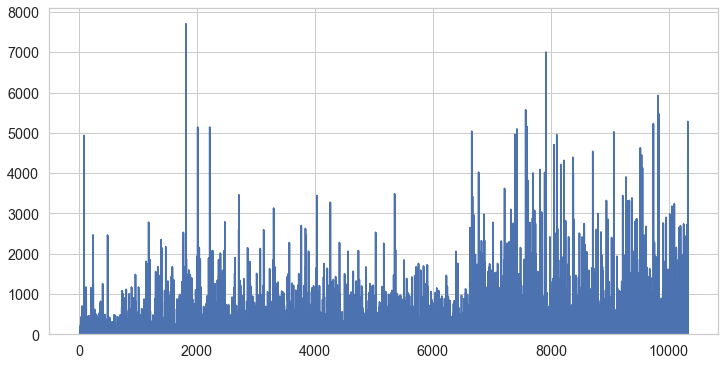

In [108]:
df['Line Item Insurance (USD)'].plot(kind='area',figsize=(12,6))

In [48]:
df.fillna(value=np.NaN,inplace=True)

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8621 entries, 0 to 10320
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   ID                            8621 non-null   int64         
 1   Project Code                  8621 non-null   object        
 2   PQ                            8621 non-null   object        
 3   PO/SO                         8621 non-null   object        
 4   ASN/DN                        8621 non-null   object        
 5   Country                       8621 non-null   object        
 6   Managed By                    8621 non-null   object        
 7   Fulfill Via                   8621 non-null   object        
 8   Vendor INCO Term              8621 non-null   object        
 9   Shipment Mode                 8310 non-null   object        
 10  PQ First Sent to Client Date  8621 non-null   object        
 11  PO Sent to Vendor Date       

In [82]:
df['Weight']

<bound method Series.unique of 0        13                     
1        358                    
2        171                    
3        1855                   
4        7590                   
         ...                    
10316    1547                   
10317    See DN-4282 (ID#:83919)
10318    See DN-4307 (ID#:83920)
10319    See DN-4307 (ID#:83920)
10320    See DN-4313 (ID#:83921)
Name: Weight, Length: 8621, dtype: object>

In [142]:
list_01 = int[df[df['Weight (Kilograms)'] == 'See DN-4282 (ID#:83919)'].index,
df[df['Weight (Kilograms)'] == 'See DN-4307 (ID#:83920)'].index,
df[df['Weight (Kilograms)'] == 'See DN-4307 (ID#:83921)'].index,
df[df['Weight (Kilograms)'] == 'See DN-4313 (ID#:83921)'].index]

TypeError: int() takes at most 2 arguments (4 given)

In [133]:
df[df['Weight (Kilograms)'] == 'See DN-4282 (ID#:83919)'].index

Int64Index([10317], dtype='int64')

In [130]:
list_1

[Int64Index([10317], dtype='int64'),
 Int64Index([8875, 8876, 10318, 10319], dtype='int64'),
 Int64Index([], dtype='int64'),
 Int64Index([8399, 10320], dtype='int64')]

In [143]:
df.drop(df[df['Weight (Kilograms)'] == 'See DN-4307 (ID#:83920)'].index,inplace=True)

In [144]:
df.drop(df[df['Weight (Kilograms)'] == 'See DN-4282 (ID#:83919)'].index,inplace=True)

In [145]:
df.drop(df[df['Weight (Kilograms)'] == 'See DN-4307 (ID#:83920)'].index,inplace=True)

In [146]:
df.drop(df[df['Weight (Kilograms)'] == 'See DN-4307 (ID#:83921)'].index,inplace=True)

In [148]:
df.drop(df[df['Weight (Kilograms)'] == 'See DN-4313 (ID#:83921)'].index,inplace=True)

In [151]:
df['Weight (Kilograms)'].unique

<bound method Series.unique of 0        13                        
1        358                       
2        171                       
3        1855                      
4        7590                      
         ...                       
10315    15198                     
10316    1547                      
10321    Weight Captured Separately
10322    1392                      
10323    Weight Captured Separately
Name: Weight (Kilograms), Length: 10317, dtype: object>

In [152]:
df[df['Weight (Kilograms)']=='Weight Captured Separately'].index

Int64Index([   12,    15,    16,    31,    35,    36,    37,    40,    42,
               47,
            ...
            10116, 10117, 10163, 10171, 10173, 10182, 10190, 10300, 10321,
            10323],
           dtype='int64', length=1507)

In [153]:
df.drop(df[df['Weight (Kilograms)']=='Weight Captured Separately'].index,inplace=True)

In [154]:
df["Weight (Kilograms)"].unique

<bound method Series.unique of 0        13                     
1        358                    
2        171                    
3        1855                   
4        7590                   
         ...                    
10313    See DN-4177 (ID#:82804)
10314    See DN-4274 (ID#:84472)
10315    15198                  
10316    1547                   
10322    1392                   
Name: Weight (Kilograms), Length: 8810, dtype: object>

In [178]:
df.drop(df[df['Weight (Kilograms)'] == 'See DN-4243 (ID#:83907)'].index,inplace=True)

In [196]:
df.loc[5,'Weight (Kilograms)'] = 504.1

In [197]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8799 entries, 0 to 10322
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   ID                            8799 non-null   int64         
 1   Project Code                  8799 non-null   object        
 2   PQ #                          8799 non-null   object        
 3   PO / SO #                     8799 non-null   object        
 4   ASN/DN #                      8799 non-null   object        
 5   Country                       8799 non-null   object        
 6   Managed By                    8799 non-null   object        
 7   Fulfill Via                   8799 non-null   object        
 8   Vendor INCO Term              8799 non-null   object        
 9   Shipment Mode                 8486 non-null   object        
 10  PQ First Sent to Client Date  8799 non-null   object        
 11  PO Sent to Vendor Date       

In [9]:
df[df['Weight (Kilograms)'] == 'Weight Captured Separately'].index

Int64Index([   12,    15,    16,    31,    35,    36,    37,    40,    42,
               47,
            ...
            10116, 10117, 10163, 10171, 10173, 10182, 10190, 10300, 10321,
            10323],
           dtype='int64', length=1507)

In [10]:
shipping_df=df.drop(df[df['Weight (Kilograms)'] == 'Weight Captured Separately'].index,inplace=True)

In [11]:
df[df['Freight Cost (USD)'] == 'Freight Included in Commodity Cost'].index

Int64Index([    6,     9,    10,    21,    90,   133,   138,   146,   170,
              185,
            ...
             9888,  9889,  9891,  9915,  9917,  9918,  9919, 10174, 10175,
            10322],
           dtype='int64', length=196)

In [12]:
df.drop(df[df['Freight Cost (USD)'] == 'Freight Included in Commodity Cost'].index,inplace=True)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8621 entries, 0 to 10320
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   ID                            8621 non-null   int64         
 1   Project Code                  8621 non-null   object        
 2   PQ                            8621 non-null   object        
 3   PO/SO                         8621 non-null   object        
 4   ASN/DN                        8621 non-null   object        
 5   Country                       8621 non-null   object        
 6   Managed By                    8621 non-null   object        
 7   Fulfill Via                   8621 non-null   object        
 8   Vendor INCO Term              8621 non-null   object        
 9   Shipment Mode                 8310 non-null   object        
 10  PQ First Sent to Client Date  8621 non-null   object        
 11  PO Sent to Vendor Date       

In [41]:
df.columns

Index(['ID', 'Project Code', 'PQ', 'PO/SO', 'ASN/DN', 'Country', 'Managed By',
       'Fulfill Via', 'Vendor INCO Term', 'Shipment Mode',
       'PQ First Sent to Client Date', 'PO Sent to Vendor Date',
       'Scheduled Delivery Date', 'Delivered to Client Date',
       'Delivery Recorded Date', 'Product Group', 'Sub Classification',
       'Vendor', 'Item Description', 'Molecule/Test Type', 'Brand', 'Dosage',
       'Dosage Form', 'Unit of Measure (Per Pack)', 'Line Item Quantity',
       'Line Item Value', 'Pack Price', 'Unit Price', 'Manufacturing Site',
       'First Line Designation', 'Weight', 'Freight Cost (USD)',
       'Line Item Insurance (USD)'],
      dtype='object')

In [40]:
df.rename(columns={"PQ #":"PQ", "PO / SO #":"PO/SO","ASN/DN #":"ASN/DN",
                                         'Weight (Kilograms)':"Weight"},errors='ignore',inplace=True)

In [ ]:
df

<AxesSubplot:>

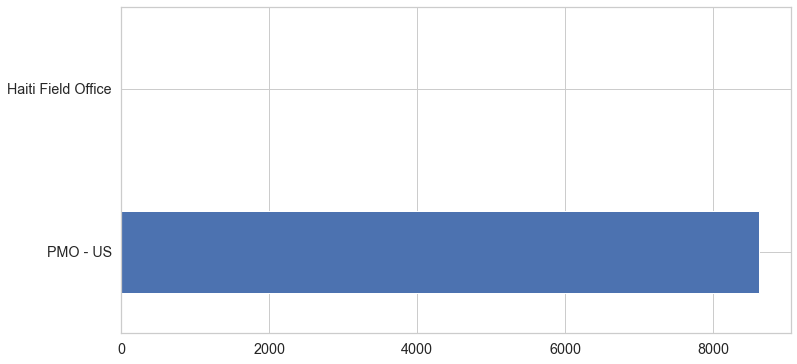

In [37]:
df['Managed By'].value_counts().plot(kind='barh',figsize=(12,6))

<AxesSubplot:>

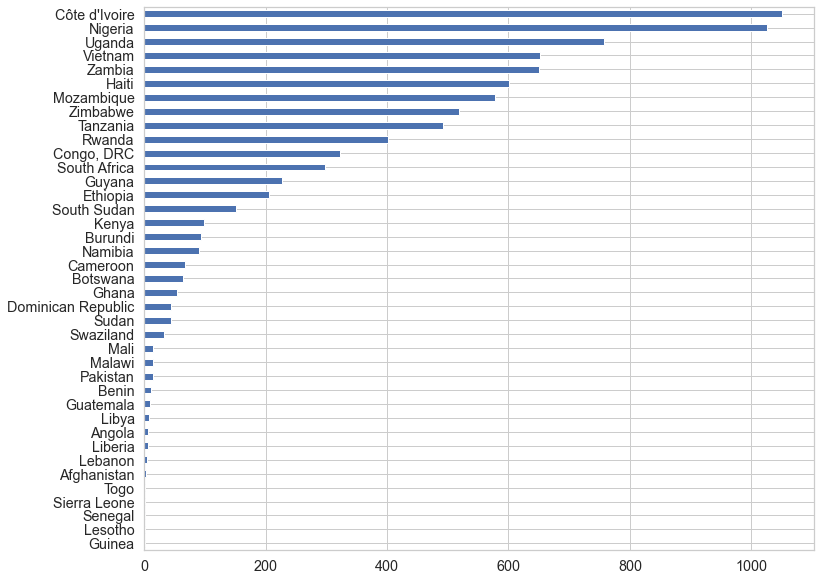

In [38]:
df.Country.value_counts().sort_values(ascending=True).plot(kind='barh',figsize=(12,10))

In [ ]:
df['ID'].unique()

In [ ]:
df['ID'].plot(kind='line')

In [ ]:
df.groupby(['Shipment Mode'])['Revenue'].agg('sum')